In [2]:
import numpy as np
import pandas as pd
import tarfile
import urllib.request
from pathlib import Path


def load_housing_data():
    tarball_path = Path("numpyex/housing.tgz")
    if not tarball_path.is_file():
        Path("numpyex").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="numpyex")
    return pd.read_csv(Path("numpyex/housing/housing.csv"))
house=load_housing_data()
house.head()




,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


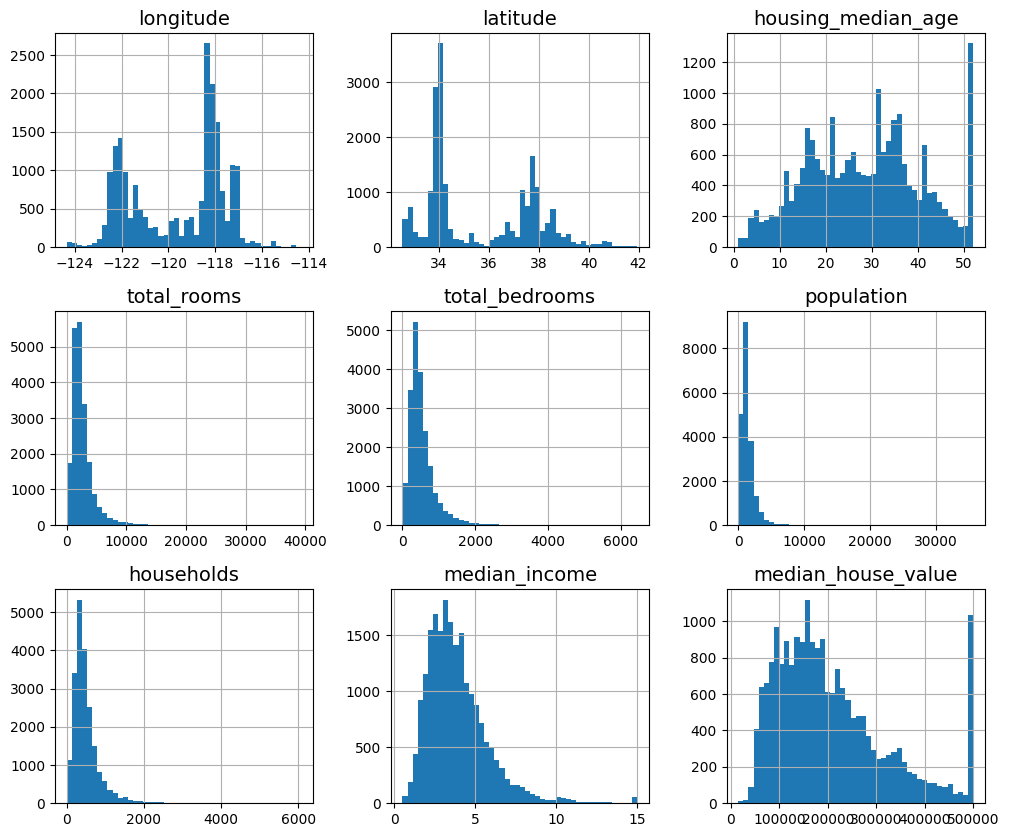

In [3]:

import matplotlib.pyplot as plt
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
house.hist(bins=46,figsize=(12,10))
plt.show()










    


In [4]:
house["med_inc_cat"] = pd.cut(house["median_income"], bins=[0, 1, 3, 4, 6, np.inf], labels=[1, 2, 3, 4, 5])

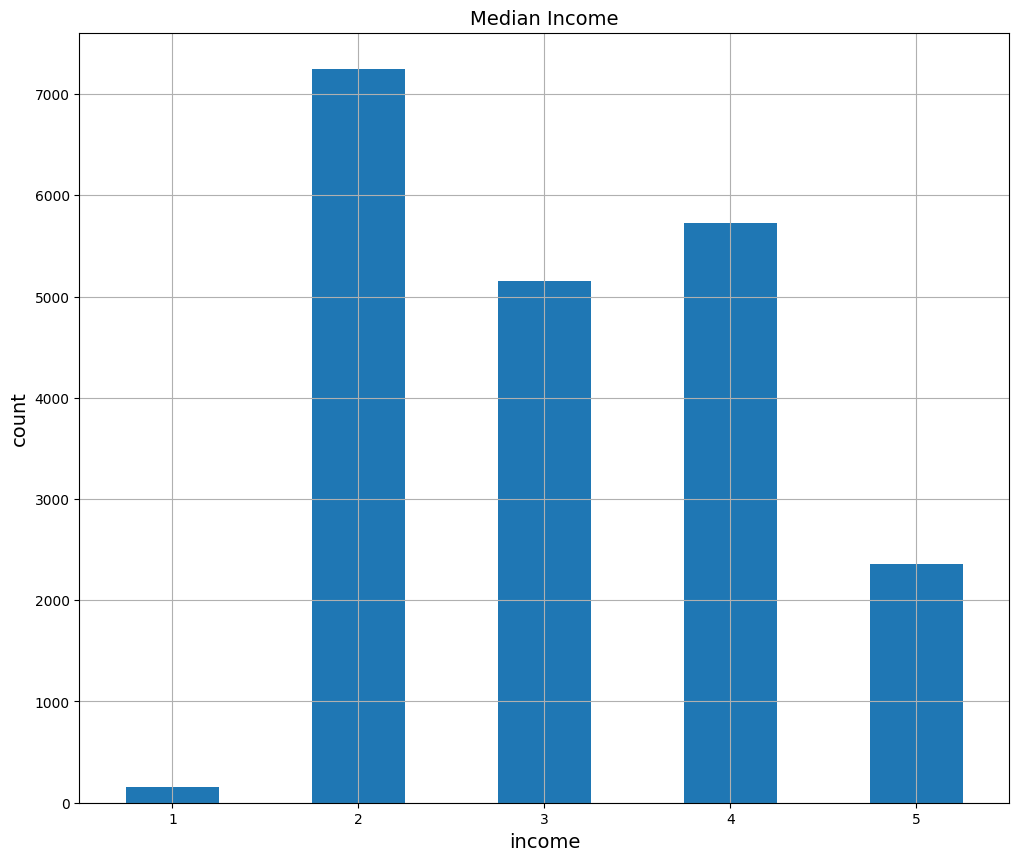

In [5]:
house["med_inc_cat"].value_counts().sort_index().plot.bar(rot=0, figsize=(12,10),grid=True)
plt.title("Median Income")
plt.xlabel("income")
plt.ylabel("count")
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
strat_train_set, strat_test_set = train_test_split(
house, test_size=0.2, stratify=house["med_inc_cat"], random_state=42)
strat_test_set["med_inc_cat"].value_counts() / len(strat_test_set)


    
    
    
    
    
    
    
    


med_inc_cat
2    0.351017
4    0.277374
3    0.249516
5    0.114341
1    0.007752
Name: count, dtype: float64

In [7]:
house=strat_train_set.copy()
print(strat_train_set.head())


       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13671    -121.95     37.29                30.0       3734.0           813.0   
399      -122.05     37.38                24.0       2424.0           501.0   
260      -117.63     33.47                 4.0       2320.0           405.0   
13793    -124.17     40.80                52.0       1606.0           419.0   
5542     -118.24     34.16                52.0        850.0           162.0   

       population  households  median_income  median_house_value  \
13671      1834.0       824.0         3.4505            260000.0   
399        1367.0       507.0         4.0720            364200.0   
260        1408.0       477.0         6.3369            256000.0   
13793       891.0       367.0         1.5850             75500.0   
5542        493.0       160.0         6.9408            298800.0   

      ocean_proximity med_inc_cat  
13671       <1H OCEAN           3  
399         <1H OCEAN           4  
260     

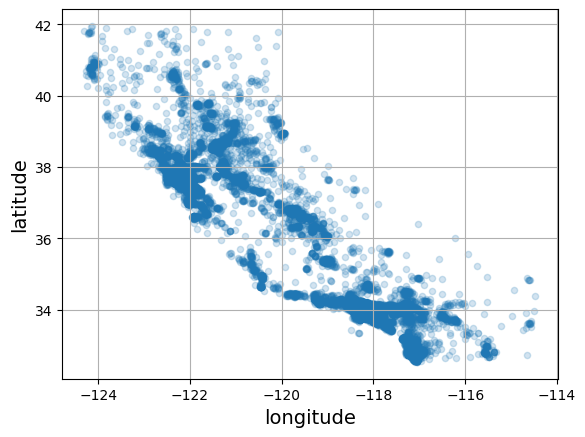

In [8]:
house.plot(kind="scatter",x="longitude",y="latitude",grid="True",alpha=0.2)
plt.show()

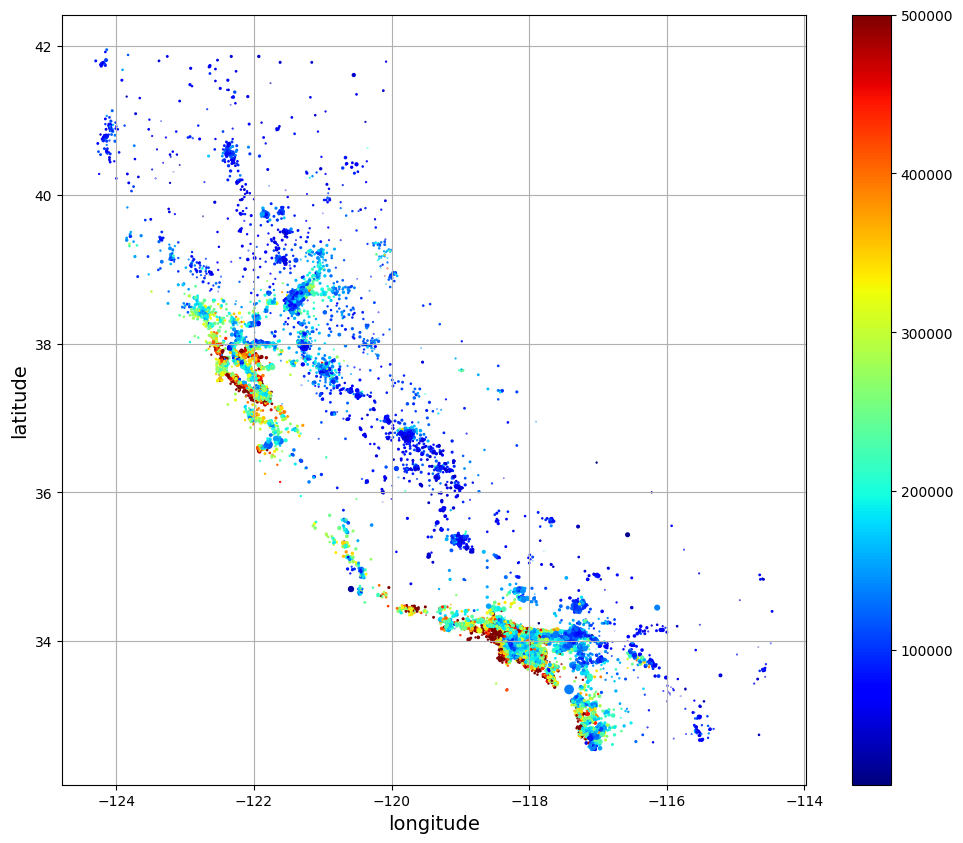

In [9]:
house.plot(kind="scatter",x="longitude",y="latitude",grid="True",s=(house["population"])/1000,c=house["median_house_value"],cmap="jet",colorbar=True,legend=True
,figsize=(12,10))
plt.show()

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='population', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='latitude', ylabel='median_house_value'>,
        <Axes: xlabel='longitude', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='population'>,
        <Axes: xlabel='population', ylabel='population'>,
        <Axes: xlabel='median_income', ylabel='population'>,
        <Axes: xlabel='total_rooms', ylabel='population'>,
        <Axes: xlabel='latitude', ylabel='population'>,
        <Axes: xlabel='longitude', ylabel='population'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='population', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabe

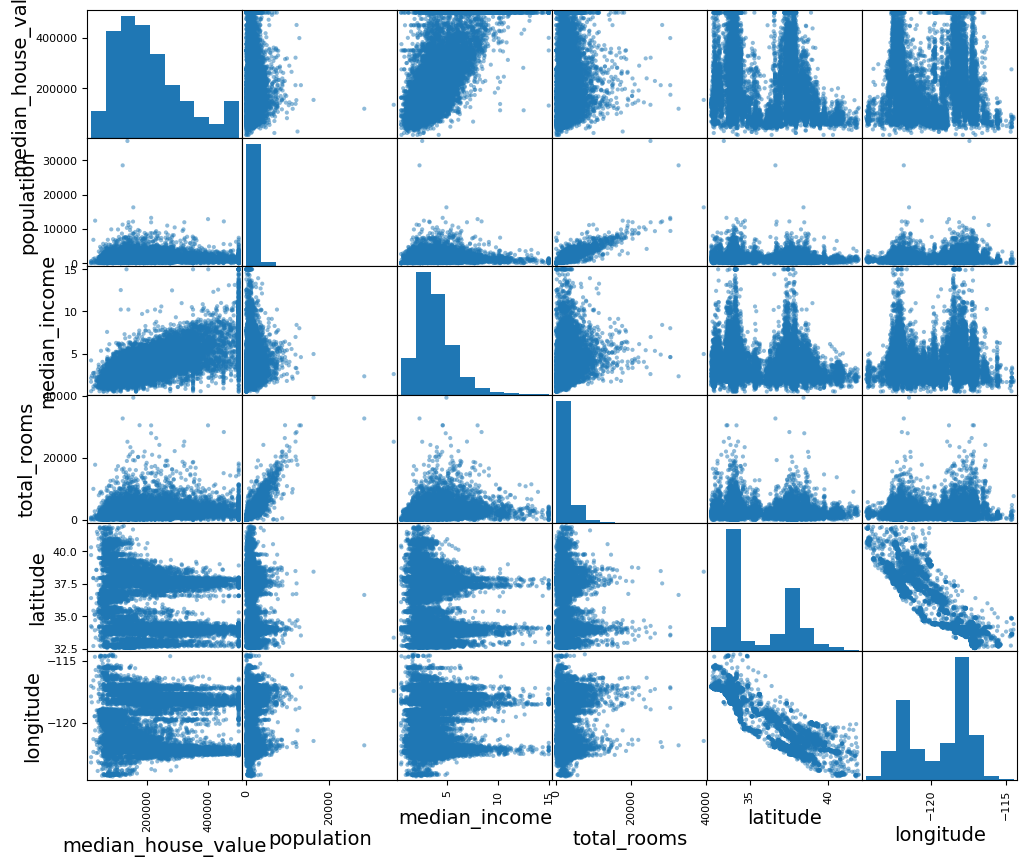

In [10]:
from pandas.plotting import scatter_matrix
attributes=["median_house_value","population","median_income","total_rooms","latitude","longitude"]
scatter_matrix(house[attributes],figsize=(12,10))
                                               



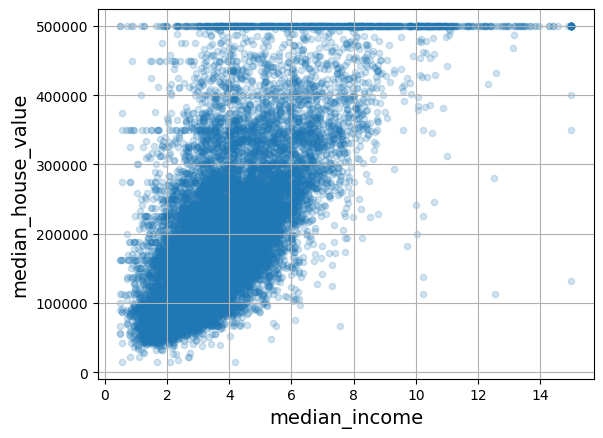

In [11]:
house.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.2,grid=True)
plt.show()

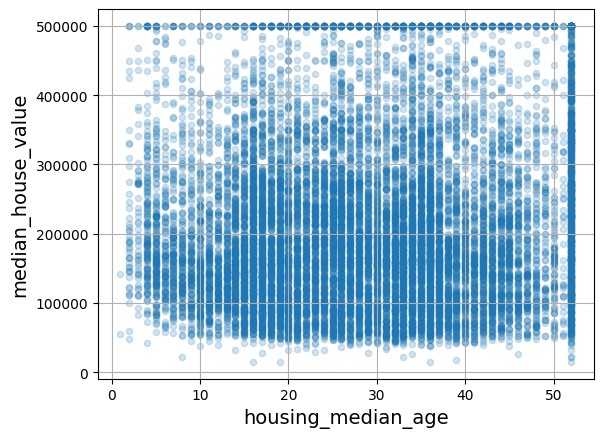

In [12]:
house.plot(kind="scatter",x="housing_median_age",y="median_house_value",alpha=0.2,grid=True)
plt.show()

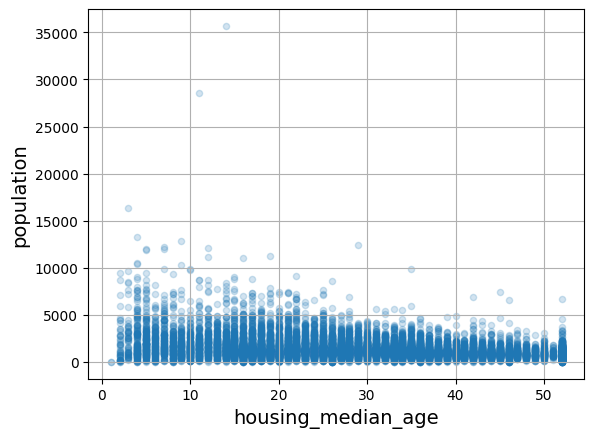

In [13]:
house.plot(kind="scatter",x="housing_median_age",y="population",alpha=0.2,grid=True)
plt.show()

In [14]:

house=strat_train_set.drop("median_house_value",axis=1)
housing_labels=strat_train_set["median_house_value"].copy()

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder


from sklearn.compose import make_column_selector
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer



cat_pipeline=make_pipeline(SimpleImputer(strategy="most_frequent"),OneHotEncoder(handle_unknown="ignore"))






def ratio(x):
    return x[:,[0]]/x[:,[1]]
def ratio_name(feature_transformer,features_names_in):
    return ['ratio']

def ratio_pipeline():
    return make_pipeline(SimpleImputer(strategy="median"),FunctionTransformer(ratio,feature_names_out=ratio_name),StandardScaler())
log_pipeline=make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log,feature_names_out="one-to-one")
)
Cluster_Simil=KMeans(n_clusters=10,n_init=10,random_state=100)
default_num_pipeline=make_pipeline(SimpleImputer(strategy="median"),StandardScaler())
custom_trans=ColumnTransformer([
    ("pop_per_house",ratio_pipeline(),["population","households"]),
    ("rooms_per_house",ratio_pipeline(),["total_rooms","households"]),
    ("bedroom_per_room",ratio_pipeline(),["total_bedrooms","total_rooms"]),
    ("log",log_pipeline,["total_rooms","total_bedrooms","median_income","population"]),
    ("geo",Cluster_Simil,["longitude","latitude"]),
    ("cat",cat_pipeline,make_column_selector(dtype_include="object")),
    
    
    
    
],
   remainder=default_num_pipeline)
house_prepared=custom_trans.fit_transform(house)
print(house_prepared.shape)
    


    


        


(16512, 24)


In [16]:
from sklearn.linear_model import LinearRegression
lin_reg=make_pipeline(custom_trans,LinearRegression())



lin_reg.fit(house, housing_labels)

# Predict and print result
predictions = lin_reg.predict(house)
print(predictions[:5].round(-2))
print(housing_labels.iloc[:5].values)
from sklearn.metrics import mean_squared_error
lin_rmse=mean_squared_error(housing_labels,predictions)

print(lin_rmse**1/2)


[265300. 274800. 280100.  98400. 336900.]
[260000. 364200. 256000.  75500. 298800.]
2399919374.087537


In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline

tree_pipeline=make_pipeline(custom_trans,DecisionTreeRegressor(random_state=34))
tree_pipeline.fit(house,housing_labels)
predic_tree=tree_pipeline.predict(house)
print(predic_tree)
error=mean_squared_error(housing_labels,predic_tree)
print(error)




[260000. 364200. 256000. ... 108700. 360700. 500001.]
0.0


In [18]:
from sklearn.model_selection import cross_val_score
import pandas as pd
val_score=-cross_val_score(tree_pipeline,house,housing_labels,cv=10,scoring="neg_mean_squared_error")

print(pd.Series(val_score).describe())


count    1.000000e+01
mean     4.549438e+09
std      2.064161e+08
min      4.317771e+09
25%      4.365676e+09
50%      4.530304e+09
75%      4.678609e+09
max      4.972444e+09
dtype: float64


In [19]:
from sklearn.ensemble import RandomForestRegressor
rtree_reg=make_pipeline(custom_trans,RandomForestRegressor(random_state=22))
rtree_reg.fit(house,housing_labels)
predict_rtree=rtree_reg.predict(house)



In [20]:
val_rscore=-cross_val_score(rtree_reg,house,housing_labels,cv=10,scoring="neg_mean_squared_error")
print(pd.Series(val_rscore).describe())
      
      

count    1.000000e+01
mean     2.297651e+09
std      1.394644e+08
min      2.124870e+09
25%      2.169002e+09
50%      2.304734e+09
75%      2.384961e+09
max      2.493797e+09
dtype: float64


In [21]:

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline





full_pipe=Pipeline([
    ("preprocessing",custom_trans),
    ("random_forest",RandomForestRegressor(random_state=23)),
            
    
    
])

param_grid=[
    {'preprocessing__geo__n_clusters':[10,2,3],
     'random_forest__max_features':[10,2,4]},
    {'preprocessing__geo__n_clusters':[3,5,4],
     'random_forest__max_features':[8,3,2]},
]
grid_search=GridSearchCV(full_pipe,param_grid,scoring="neg_root_mean_squared_error",cv=3)
grid_search.fit(house,housing_labels)




print(grid_search.best_params_)
    
    
    
    



KeyboardInterrupt: 

In [ ]:
results=pd.DataFrame(grid_search.cv_results_)
print(results)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
full


param_distrib={
    "preprocessing__geo__n_clusters":randint(low=3,high=50),
    "random_forest__max_features":randint(low=2,high=20),
}
rand_search=RandomizedSearchCV(full_pipe,param_distributions=param_distrib,n_iter=100,scoring="neg_mean_squared_error")
rand_search.fit(house,housing_labels)


In [ ]:
final_model=rand_search.best_estimator_
feat_imp=final_model["random_forest"].features_importances_
print(feat_imp.round(2))


In [ ]:
sort_data_feat_imp=sorted(zip(feat_imp,final_model["preprocessing"].get_features_names_out()),reverse=True)



In [ ]:
X_test=strat_test_set.drop("median_house_value",axis=1)
y_test=strat_test_set["median_house_value"].copy()
final_prediction=final_model.predict(X_test)


In [ ]:
mse=mean_squared_error(y_test,final_prediction)
print(mse)


In [ ]:
from scipy import stats
confidence=0.95
squared_errors=(final_prediction-y_test)**2
np.sqrt(stats.t.interval(confidence,len(squared_errors)-1,
                        loc=squared_errors.mean(),scale=stats.sem(squared_errors)))


In [ ]:
from sklearn.ensemble import RandomTreeRegressor
